In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [113]:
df=pd.read_csv("car.data",header=None)

In [114]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = columns

In [115]:
df.shape

(1728, 7)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [117]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [118]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [119]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [120]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [121]:
for col in columns:
    print(f"{col}: {df[col].unique()}")

buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']


In [122]:
df.isnull().sum().sort_values(ascending=False)

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [123]:
df['class'].value_counts(normalize=True)

class
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: proportion, dtype: float64

In [124]:
df['doors'].value_counts()

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

In [125]:
df['persons'].value_counts()

persons
2       576
4       576
more    576
Name: count, dtype: int64

In [126]:
#replacing the values
df['doors'] = df['doors'].replace('5more', '5')
df['persons'] = df['persons'].replace('more', '5')

In [127]:
df['doors'].value_counts()

doors
2    432
3    432
4    432
5    432
Name: count, dtype: int64

In [128]:
df['persons'].value_counts()

persons
2    576
4    576
5    576
Name: count, dtype: int64

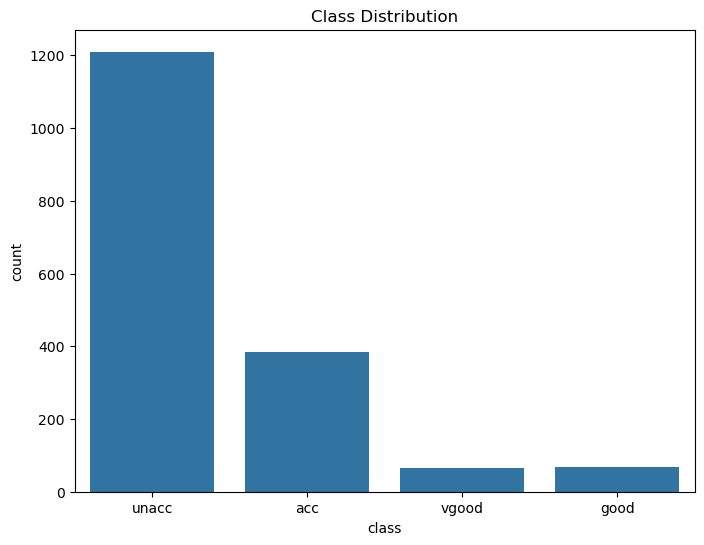

In [129]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

In [130]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [131]:
#Encoding
!pip install category_encoders

In [132]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=categorical_cols)
df=encoder.fit_transform(df)

In [133]:
df.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
class       int64
dtype: object

In [134]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


In [135]:
# Split the data into features (X) and target (y)
X = df.drop(['class', 'doors'], axis=1) 
y = df['class']

In [136]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [137]:
X_train.shape,y_train.shape

((1382, 5), (1382,))

In [138]:
X_test.shape,y_test.shape

((346, 5), (346,))

In [139]:
# applyng the Random Forest Classifier algorithm
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,max_depth=5)
dt_model.fit(X_train, y_train)
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train, y_train)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn_model.fit(X_train, y_train)
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [140]:
#model prediction
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
nb_pred = nb_model.predict(X_test) 
knn_pred = knn_model.predict(X_test)  
lr_pred = lr_model.predict(X_test)
rf_pred
dt_pred
nb_pred
knn_pred
lr_pred

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 4, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 4, 2, 1, 2,
       3, 2, 1, 4, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1,

In [141]:
rf_pred[:5]
dt_pred[:5]
nb_pred[:5]
knn_pred[:5]
lr_pred[:5]

array([1, 1, 1, 1, 1])

In [142]:
y_test[:5]

599     1
1201    2
628     1
1498    2
1263    1
Name: class, dtype: int64

In [143]:
#model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_accuracy = accuracy_score(y_test,rf_model.predict(X_test)) *100
dt_accuracy = accuracy_score(y_test,dt_model.predict(X_test)) *100
nb_accuracy = accuracy_score(y_test, nb_model.predict(X_test)) * 100
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test)) * 100
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test)) * 100

print(f"RF Accuracy: {rf_accuracy:.2f}%")
print(f"DT Accuracy: {dt_accuracy:.2f}%")
print(f"NB Accuracy: {nb_accuracy:.2f}%")
print(f"KNN Accuracy: {knn_accuracy:.2f}%")
print(f"LR Accuracy: {lr_accuracy:.2f}%")

RF Accuracy: 94.22%
DT Accuracy: 87.86%
NB Accuracy: 67.63%
KNN Accuracy: 83.82%
LR Accuracy: 82.95%


In [144]:
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99       235
           2       0.96      0.86      0.90        83
           3       0.75      0.71      0.73        17
           4       0.47      0.82      0.60        11

    accuracy                           0.94       346
   macro avg       0.79      0.84      0.81       346
weighted avg       0.95      0.94      0.95       346



In [145]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test,rf_pred)
conf_matrix

array([[234,   1,   0,   0],
       [  3,  71,   2,   7],
       [  0,   2,  12,   3],
       [  0,   0,   2,   9]])

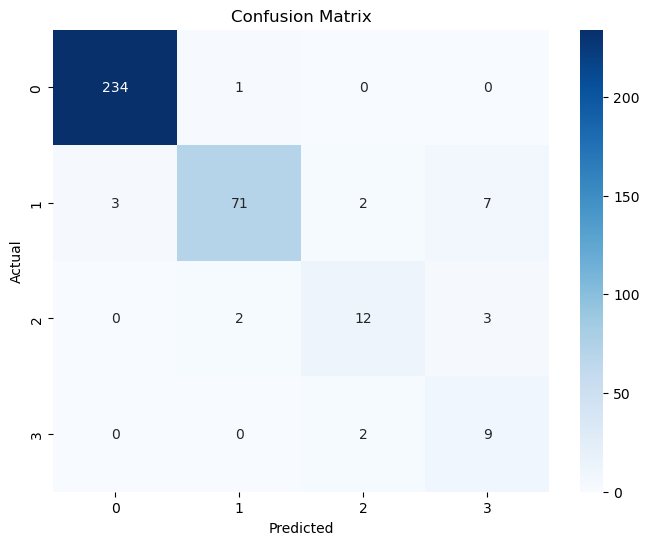

In [146]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [147]:
# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df)


Feature Importances:
     Feature  Importance
4    safety    0.326896
2   persons    0.242479
1     maint    0.167912
0    buying    0.166835
3  lug_boot    0.095878


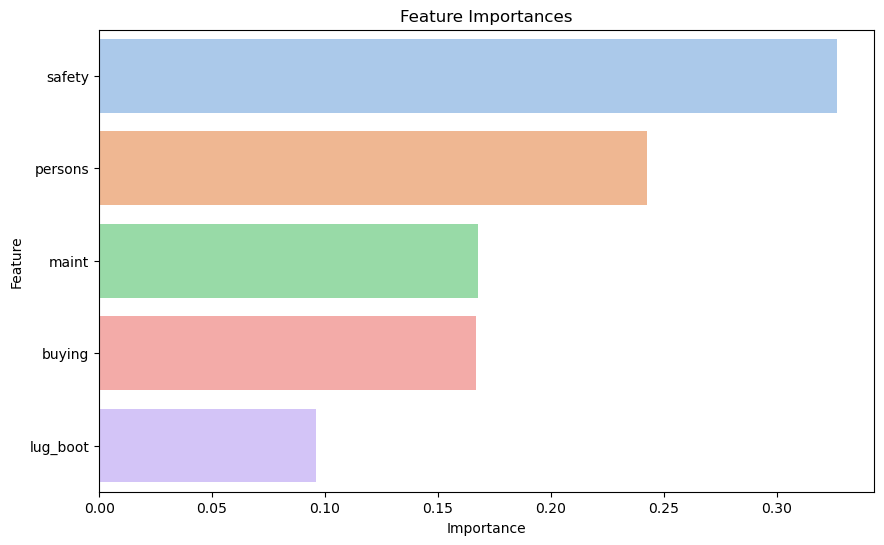

In [148]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df,palette='pastel')
plt.title('Feature Importances')
plt.show()

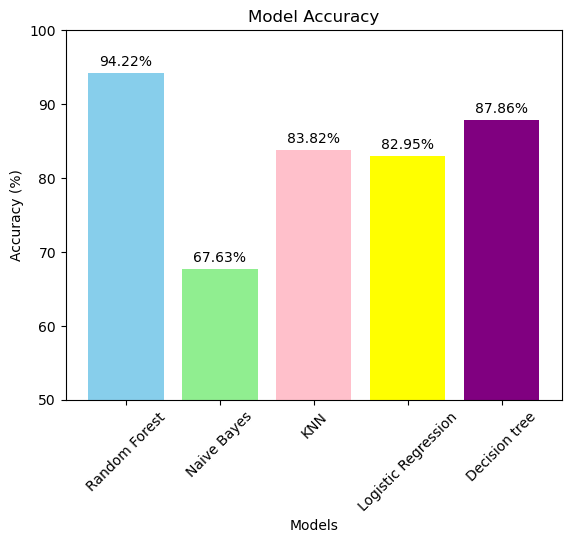

In [149]:
#bar chart for showing accuracies 
models = ['Random Forest','Naive Bayes', 'KNN', 'Logistic Regression','Decision tree']
accuracies = [rf_accuracy,nb_accuracy, knn_accuracy, lr_accuracy,dt_accuracy]
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'pink','yellow','purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.ylim(50,100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center')
plt.show()